### Here we will poke around and test at some correllation tests and plots before deciding on a data story to tell in another notebook

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import nltk
import datetime
import math
#from sqlalchemy import create_engine
#nltk.download()

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook



In [11]:
Housing_data = pd.read_csv('cleaned_1.csv')
Housing_data = Housing_data.set_index(['parcelid','Unnamed: 1'])
del Housing_data['garagetotalsqft']
#del Housing_data['regionidcounty']
#del Housing_data['airconditioningtypeid']
#del Housing_data['heatingorsystemtypeid']
#del Housing_data['calculatedbathnbr']
#del Housing_data['landtaxvaluedollarcnt']
#del Housing_data['structuretaxvaluedollarcnt']
Housing_data.head()

,,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,bathroom_number_category,decktypeid,poolsizesum,yardbuildingsqft17,yardbuildingsqft26,fireplacecnt,taxdelinquencyyear,pooltypeid,transactiondate,logerror
parcelid,Unnamed: 1,,,,,,,,,,,,,,,,,,,,,
17073783,0,-1,2,3.0,-1,2.5,1264.0,1264.0,6111,2,2,...,0,0,0.0,128.0,0.0,0,NaN,0,2016-01-27,0.0953
17088994,1,-1,1,2.0,-1,1.0,777.0,777.0,6111,1,1,...,1,0,0.0,198.0,0.0,0,NaN,0,2016-03-30,0.0198
17100444,2,-1,2,3.0,-1,2.0,1101.0,1101.0,6111,2,2,...,2,0,0.0,0.0,0.0,0,NaN,0,2016-05-27,0.0060
17102429,3,-1,1,2.0,-1,1.5,1554.0,1554.0,6111,1,2,...,3,0,0.0,0.0,0.0,1,NaN,0,2016-06-07,-0.0566
17109604,4,-1,2,4.0,-1,2.5,2415.0,2415.0,6111,2,2,...,0,0,0.0,0.0,0.0,1,NaN,0,2016-08-08,0.0573


In [12]:
Housing_data.describe()

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,taxamount,censustractandblock,bathroom_number_category,decktypeid,poolsizesum,yardbuildingsqft17,yardbuildingsqft26,fireplacecnt,pooltypeid,logerror
count,167805.000000,167805.000000,167805.000000,167805.000000,166056.000000,166992.000000,159519.000000,167805.000000,167805.000000,167805.000000,...,167794.000000,1.670020e+05,167805.000000,167805.000000,167805.000000,167805.000000,167805.000000,167805.000000,167805.000000,167805.000000
mean,-0.097893,2.223432,3.042627,3.480605,2.312542,1778.630246,1752.326939,6048.835690,2.211519,-0.070177,...,5989.373165,6.049390e+13,2.572945,0.007580,5.683949,9.246471,0.266726,0.126850,0.983654,0.013914
std,2.133755,0.988540,1.148126,3.690774,0.977808,940.356025,921.360898,20.690315,1.014684,1.367576,...,7212.175482,1.054137e+12,2.081016,0.086734,56.416211,65.685803,12.511396,0.400143,1.957168,0.165487
min,-1.000000,0.000000,0.000000,-1.000000,1.000000,2.000000,2.000000,6037.000000,-1.000000,-1.000000,...,19.920000,6.037101e+13,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.655420
25%,-1.000000,2.000000,2.000000,-1.000000,2.000000,1183.000000,1172.000000,6037.000000,2.000000,-1.000000,...,2799.002500,6.037312e+13,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.025300
50%,-1.000000,2.000000,3.000000,4.000000,2.000000,1541.000000,1520.000000,6037.000000,2.000000,-1.000000,...,4501.435000,6.037604e+13,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006000
75%,1.000000,3.000000,4.000000,7.000000,3.000000,2103.000000,2065.000000,6059.000000,3.000000,2.000000,...,6914.630000,6.059042e+13,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039200
max,13.000000,20.000000,16.000000,12.000000,20.000000,35640.000000,21929.000000,6111.000000,20.000000,24.000000,...,586639.300000,4.830301e+14,21.000000,1.000000,1750.000000,3191.000000,1366.000000,5.000000,5.000000,5.262999


In [25]:
Housing_data['transactiondate'] = pd.to_datetime(Housing_data['transactiondate'], format = '%Y-%m-%d', errors = 'coerce')
Housing_data['yearbuilt'] = pd.to_datetime(Housing_data['yearbuilt'], format='%Y', errors='coerce')
Housing_data['assessmentyear'] = pd.to_datetime(Housing_data['assessmentyear'], format='%Y-%m-%d', errors='coerce')
Housing_data['taxdelinquencyyear'] = pd.to_datetime(Housing_data['taxdelinquencyyear'], format='%Y-%m-%d', errors='coerce')


In [26]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 167805 entries, (17073783, 0) to (14737537, 77578)
Data columns (total 41 columns):
airconditioningtypeid           167805 non-null int64
bathroomcnt                     167805 non-null int64
bedroomcnt                      167805 non-null float64
buildingqualitytypeid           167805 non-null int64
calculatedbathnbr               166056 non-null float64
calculatedfinishedsquarefeet    166992 non-null float64
finishedsquarefeet12            159519 non-null float64
fips                            167805 non-null int64
fullbathcnt                     167805 non-null int64
garagecarcnt                    167805 non-null int64
heatingorsystemtypeid           167805 non-null int64
latitude                        167805 non-null float64
longitude                       167805 non-null float64
lotsizesquarefeet               149427 non-null float64
propertycountylandusecode       167805 non-null int64
propertylandusetypeid           167805 non

## First organize columns into continuous, ordinal, categorical etc.

In [27]:
cont_cols = ['calculatedfinishedsquarefeet','finishedsquarefeet12','latitude','longitude',
            'lotsizesquarefeet','taxvaluedollarcnt','taxamount','poolsizesum','propertyzoningdesc',
             'yardbuildingsqft17','yardbuildingsqft26','rawcensustractandblock','censustractandblock']
ord_cols = ['buildingqualitytypeid','bathroomcnt','bedroomcnt','fullbathcnt','garagecarcnt','roomcnt','unitcnt',
           'fireplacecnt']
cat_cols = ['propertycountylandusecode','propertylandusetypeid',
           'propertylandusetypeid','regionidcity','regionidneighborhood',
           'regionidzip','decktypeid','pooltypeid']
date_cols = ['yearbuilt','assessmentyear','taxdelinquencyyear','transactiondate']

In [28]:
for col in cont_cols:
    correl = Housing_data[col].corr(Housing_data['logerror'])
    print(col, correl)

calculatedfinishedsquarefeet 0.0397104454726
finishedsquarefeet12 0.0439771169822
latitude -0.00272465842701
longitude 0.00534421808767
lotsizesquarefeet 0.00782646325608
taxvaluedollarcnt 0.00429764167844
taxamount -0.00309989704541
poolsizesum -0.00419437423264
propertyzoningdesc 0.00217036976099
yardbuildingsqft17 -0.00195256361826
yardbuildingsqft26 -0.00171845300943
rawcensustractandblock 0.00743580710626
censustractandblock 0.00413171276405


In [29]:
for col in ord_cols:
    correl = Housing_data[col].corr(Housing_data['logerror'])
    print(col, correl)

buildingqualitytypeid -0.0100798852204
bathroomcnt 0.0262657981966
bedroomcnt 0.0287983458474
fullbathcnt 0.0247077272959
garagecarcnt 0.0108837384097
roomcnt 0.0100049500909
unitcnt -0.00626831555283
fireplacecnt 0.00509950477901


In [30]:
#for col in cat_cols:
   # print(Housing_data[[col, 'logerror']].groupby([col], 
                                             #as_index=False).mean().sort_values(by='logerror', ascending=False))

From the continuous columns we will look in depth into a few of them based on their correllation.

<IPython.core.display.Javascript object>


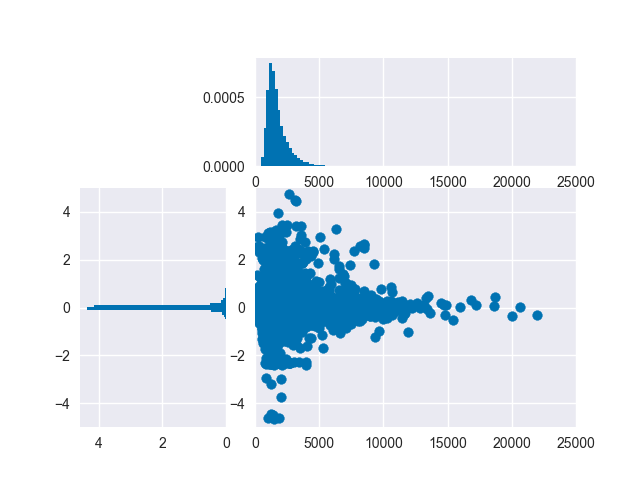

In [31]:
import matplotlib.gridspec as gridspec
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

space_df = Housing_data[['finishedsquarefeet12','logerror']].dropna()

lower_right.scatter(space_df['finishedsquarefeet12'],space_df['logerror'])
top_histogram.clear()
top_histogram.hist(space_df['finishedsquarefeet12'], bins=100, normed = True)
side_histogram.clear()
side_histogram.hist(space_df['logerror'], bins=100, orientation='horizontal', normed = True)
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 25000)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

<IPython.core.display.Javascript object>


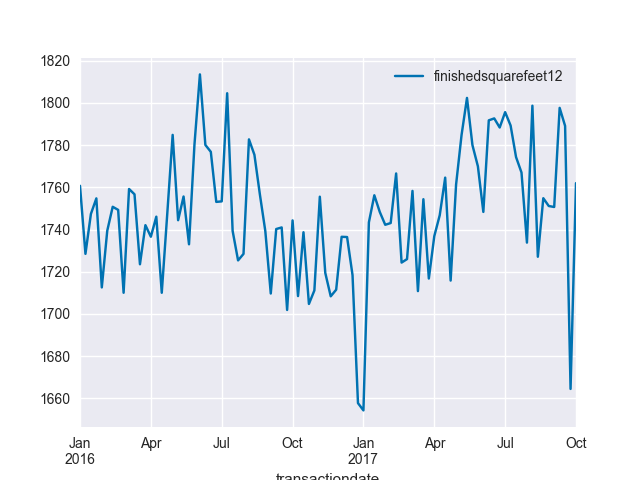

In [32]:
plt.style.use('seaborn-colorblind')
datedf = Housing_data[['finishedsquarefeet12','transactiondate']].dropna()
datedf = datedf.set_index('transactiondate').copy()
datedf.sort_index(inplace=True)
datedf = datedf.resample('W').mean()

datedf.plot();

<IPython.core.display.Javascript object>


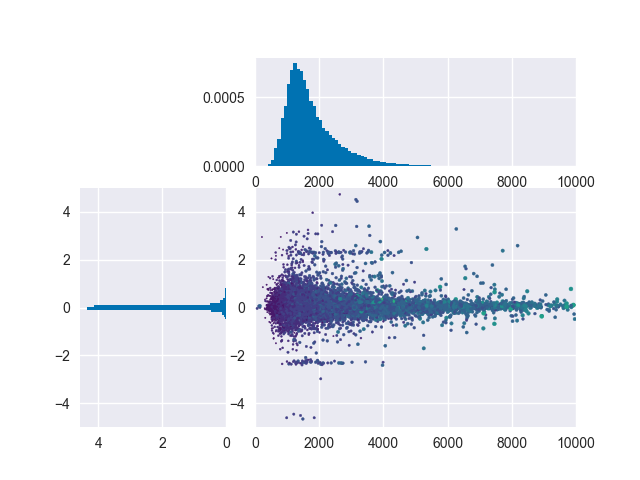

In [41]:
plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

smallhousedf = Housing_data.drop(['taxdelinquencyyear'], axis = 1)
smallhousedf = smallhousedf.dropna()
smallhousedf=smallhousedf[smallhousedf['finishedsquarefeet12'] <= 10000]

lower_right.scatter(smallhousedf['finishedsquarefeet12'],smallhousedf['logerror'], 
                    c = smallhousedf['bedroomcnt'], s = smallhousedf['bedroomcnt'], cmap = 'viridis')
top_histogram.clear()
top_histogram.hist(smallhousedf['finishedsquarefeet12'], bins=100, normed = True)
side_histogram.clear()
side_histogram.hist(smallhousedf['logerror'], bins=100, orientation='horizontal', normed = True)
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 10000)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

The most inaccurate estimates occur when the square footage is less than 1000 and even 4000

In [42]:
cont_cols = ['calculatedfinishedsquarefeet','finishedsquarefeet12','latitude','longitude',
            'lotsizesquarefeet','taxvaluedollarcnt','taxamount','poolsizesum','propertyzoningdesc',
             'yardbuildingsqft17','yardbuildingsqft26','rawcensustractandblock','censustractandblock']
ord_cols = ['buildingqualitytypeid','bathroomcnt','bedroomcnt','fullbathcnt','garagecarcnt','roomcnt','unitcnt',
           'fireplacecnt']
cat_cols = ['propertycountylandusecode','propertylandusetypeid',
           'propertylandusetypeid','regionidcity','regionidneighborhood',
           'regionidzip','decktypeid','pooltypeid']
date_cols = ['yearbuilt','assessmentyear','taxdelinquencyyear','transactiondate']

<IPython.core.display.Javascript object>


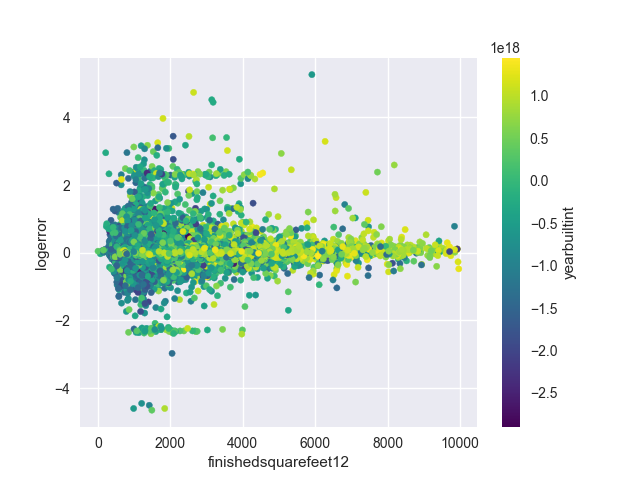

In [43]:
smallhousedf['yearbuiltint'] = smallhousedf['yearbuilt'].astype(int)

smallhousedf.plot.scatter('finishedsquarefeet12', 'logerror', c='yearbuiltint', 
                           colormap='viridis')


<IPython.core.display.Javascript object>


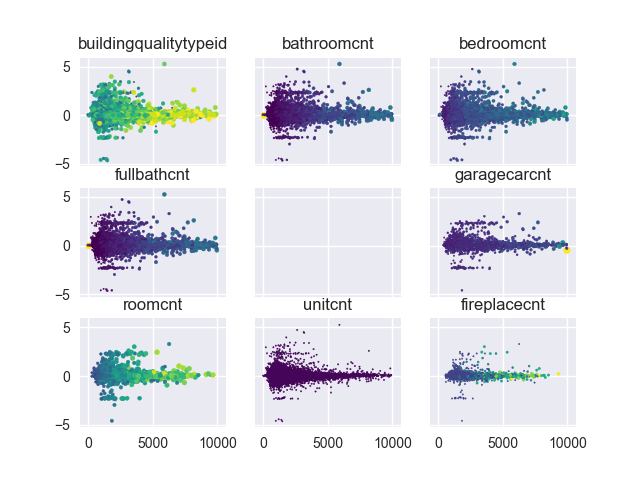

/anaconda/lib/python3.6/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [44]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax9,ax5), (ax6,ax7,ax8)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 

axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for n in range(0, len(axs)):
    axs[n].scatter(smallhousedf['finishedsquarefeet12'],smallhousedf['logerror'], 
                    c = smallhousedf[ord_cols[n]], s = smallhousedf[ord_cols[n]], cmap = 'viridis')
    axs[n].set_title(ord_cols[n])

<IPython.core.display.Javascript object>


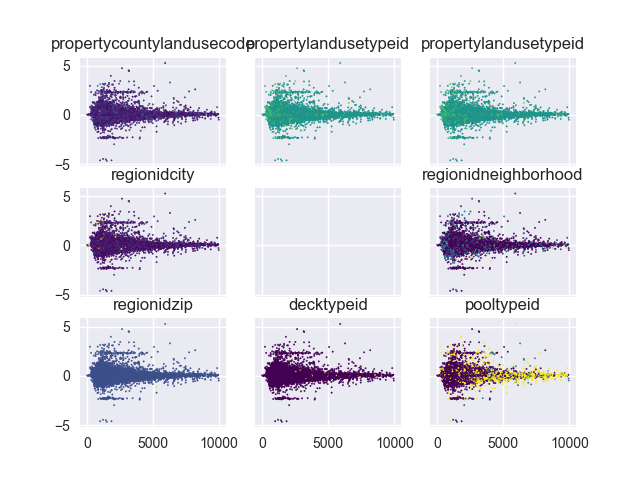

In [47]:
# create a 3x3 grid of subplots
fig, ((bx1,bx2,bx3), (bx4,bx9,bx5), (bx6,bx7,bx8)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 

bxs = [bx1,bx2,bx3,bx4,bx5,bx6,bx7,bx8]

for n in range(0, len(bxs)):
    bxs[n].scatter(smallhousedf['finishedsquarefeet12'],smallhousedf['logerror'], 
                    c = smallhousedf[cat_cols[n]], s = 1, cmap = 'viridis')
    bxs[n].set_title(cat_cols[n])

In [56]:
anamoly_df = smallhousedf[((smallhousedf['logerror'] > 2) & (smallhousedf['logerror'] < 2.5)) | 
                         ((smallhousedf['logerror'] < int(-2)) & (smallhousedf['logerror'] > int(-2.5)))]

anamoly_df.head()

,,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,bathroom_number_category,decktypeid,poolsizesum,yardbuildingsqft17,yardbuildingsqft26,fireplacecnt,pooltypeid,transactiondate,logerror,yearbuiltint
parcelid,Unnamed: 1,,,,,,,,,,,,,,,,,,,,,
12252349,2450,-1,2,3.0,4,2.0,3330.0,3330.0,6037,2,-1,...,1,0,0.0,0.0,0.0,0,0,2016-01-13,2.349,315532800000000000
11891916,2823,1,3,4.0,4,3.0,3098.0,3098.0,6037,3,-1,...,4,0,0.0,0.0,0.0,0,1,2016-06-06,2.239,-946771200000000000
12219932,6009,-1,1,2.0,7,1.0,840.0,840.0,6037,1,-1,...,1,0,0.0,0.0,0.0,0,0,2016-08-01,2.195,-1451692800000000000
11062523,6817,-1,4,7.0,7,4.0,3942.0,3942.0,6037,4,-1,...,4,0,0.0,0.0,0.0,0,5,2016-06-27,2.036,-631152000000000000
11688847,10134,-1,3,2.0,1,3.0,1736.0,1736.0,6037,3,-1,...,1,0,0.0,0.0,0.0,0,0,2016-03-17,2.457,-473385600000000000


In [55]:
smallhousedf.describe()

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,garagecarcnt,...,censustractandblock,bathroom_number_category,decktypeid,poolsizesum,yardbuildingsqft17,yardbuildingsqft26,fireplacecnt,pooltypeid,logerror,yearbuiltint
count,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,...,1.409700e+05,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,140970.000000,1.409700e+05
mean,0.007136,2.238356,3.093453,3.906363,2.292310,1793.803937,1793.803937,6047.487621,2.237228,-0.151529,...,6.048123e+13,2.566574,0.006810,6.677272,10.377598,0.309307,0.137866,1.133582,0.014582,-8.809263e+16
std,2.262117,0.938980,0.999822,3.587790,0.955537,913.224049,913.224049,20.389572,0.936319,1.358961,...,1.143470e+12,2.048597,0.082241,61.014005,70.023099,13.557450,0.418025,2.059696,0.159681,7.149570e+17
min,-1.000000,1.000000,0.000000,-1.000000,1.000000,2.000000,2.000000,6037.000000,1.000000,-1.000000,...,6.037101e+13,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.655420,-2.903213e+18
25%,-1.000000,2.000000,2.000000,-1.000000,2.000000,1200.000000,1200.000000,6037.000000,2.000000,-1.000000,...,6.037301e+13,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.024670,-5.364576e+17
50%,-1.000000,2.000000,3.000000,4.000000,2.000000,1558.000000,1558.000000,6037.000000,2.000000,-1.000000,...,6.037574e+13,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006000,-1.262304e+17
75%,1.000000,3.000000,4.000000,7.000000,3.000000,2132.000000,2132.000000,6059.000000,3.000000,1.000000,...,6.059032e+13,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039190,4.733856e+17
max,13.000000,20.000000,16.000000,12.000000,20.000000,9961.000000,9961.000000,6111.000000,20.000000,24.000000,...,4.830301e+14,21.000000,1.000000,1750.000000,3191.000000,1366.000000,5.000000,5.000000,5.262999,1.451606e+18
